<a href="https://colab.research.google.com/github/xianyingkong/diffusion-text-generation/blob/simple-diffuseq-0129/embedding_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import datetime
from transformers import BertTokenizerFast
import transformers
import os
import torch
import numpy as np

In [3]:
word_embedding = torch.load('word_embedding_with_player.pt', map_location=torch.device('cpu'))

In [3]:
# word_embedding

In [4]:
# word_embedding_np = word_embedding.numpy()
# word_embedding_np

In [5]:
# np.savetxt('word_embedding.tsv', word_embedding_np, delimiter = '\t')

In [6]:
# word_embedding.shape

In [7]:
# words = []
# with open("vocab.txt", "r") as f:
#     for x in f:
#         words.append(x.strip())

In [8]:
# complete_words_idx = [i for i in range(len(words)) if ('#' not in words[i] and len(words[i]) > 2)]

In [9]:
# complete_word_embeddings = []
# complete_words = []
# for i in complete_words_idx:
#     complete_word_embeddings.append(word_embedding_np[i])
#     complete_words.append([words[i]])

In [10]:
# len(complete_words)

In [11]:
# np.savetxt('complete_words_embedding.tsv', np.array(complete_word_embeddings), delimiter = '\t')
# np.savetxt('complete_words.txt', np.array(complete_words), fmt='%s')

In [12]:
# pip install umap-learn

In [4]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-02-27 21:30:15.714919: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-27 21:30:15.761597: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 21:30:15.761621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 21:30:15.762885: E extern

In [5]:
tokenizer = BertTokenizerFast('vocab.txt')
tokenizer

PreTrainedTokenizerFast(name_or_path='', vocab_size=30267, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [782]:
# type1 = ['he', 'man', 'king', 'father']
# type2 = ['woman', 'she', 'mother', 'her']
# type1 = ['king', 'queen', 'mother', 'father', 'prince', 'princess']
# type2 = ['love', 'die', 'kill', 'poison', 'stab']

# == positive vs negative
# type1 = ['love', 'affection', 'adoration', 'devotion', 'fondness', 'protects', 'protect',
#         'beautiful', 'beauty', 'brave', 'fair', 'fain', 'honest', 'tall', 'liked',
#         'perfectly', 'happy', 'handsome', 'smart', 'yarely', 'successful', 'cleanliest', 'lover']
# type2 = ['hate', 'loathe', 'unhappy', 'fear', 'filthy',
#          'dreadful', 'disturbing', 'angry', 'lust', 'fat', 'fool', 'cowardly',
#          'base', 'heavy', 'ill', 'unpregnant', 'zany', 'lonely']

# == tragedies vs comedies
# type2 = ['death', 'revenge', 'false', 'fate', 'ghost', 'tragedy', 'sorrow', 'betray', 'despair', 'murderer']
# type1 = ['wit', 'fool', 'laughter', 'disguise', 'comedy', 'merriment', 'festivity', 'wife', 'love', 'humour']
# words = type1 + type2
# labels = [1]*len(type1) + [0]*len(type2)

# == tragedies vs comedies
type2 = ['hamlet', 'claudius', 'ophelia', 'ghost', 'denmark']
type3 = ['romeo', 'juliet', 'friar', 'capulet']
type1 = ['othello', 'iago', 'desdemona', 'emilia']
type4 = ['queen', 'elizabeth', 'hastings', 'king', 'tyrant']

words = type1 + type2 + type3 + type4 
labels = [0]*len(type1) + [1]*len(type2) + [2]*len(type3) + [3]*len(type4) 

idx = []
selected_word_embeds = []
vocab_dict = tokenizer.get_vocab()
for i in words:
    idx.append(vocab_dict[i])

for i in idx:
    selected_word_embeds.append(word_embedding[i].detach().numpy())

selected_word_embeds = np.array(selected_word_embeds)

In [783]:
selected_word_embeds.shape

(18, 128)

In [788]:
reducer = umap.UMAP(random_state=12, min_dist=0.4, n_components=2, n_neighbors=3, transform_seed=12)
# reducer = umap.UMAP(random_state=2, min_dist=0.55, n_components=2, n_neighbors=5, transform_seed=2)

In [789]:
embedding = reducer.fit_transform(selected_word_embeds)

/home/xykong/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [790]:
embedding.shape

(18, 2)

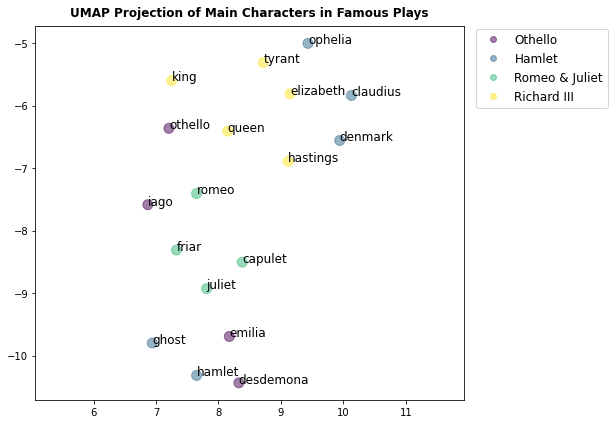

In [791]:
dim = [0, 1]
fig, ax = plt.subplots(figsize=(9, 6))
scatter = ax.scatter(embedding[:, dim[0]], embedding[:, dim[1]], c=labels, cmap='viridis', alpha=0.5, s=100)
plt.gca().set_aspect('equal', 'datalim')
plt.title("UMAP Projection of Main Characters in Famous Plays", fontsize=12, fontweight='bold', pad=10)
for i, j in enumerate(words):
    ax.annotate(j, (embedding[:, dim[0]][i], embedding[:, dim[1]][i]), fontsize=12, color='black')
legend_labels = ['Othello', 'Hamlet', 'Romeo & Juliet', 'Richard III']  # Modify as needed
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right', fontsize=12, bbox_to_anchor=(1.35, 1.01))
plt.tight_layout()  # Adjust layout
plt.show()

In [750]:
n = selected_word_embeds.shape[0]
tsne_word_embeds = TSNE(n_components=2, learning_rate='auto', init='random', method='exact', perplexity=4, random_state=102).fit_transform(selected_word_embeds)
tsne_word_embeds = (tsne_word_embeds - tsne_word_embeds.mean(axis=0))/tsne_word_embeds.std(axis=0)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float32')) -> None

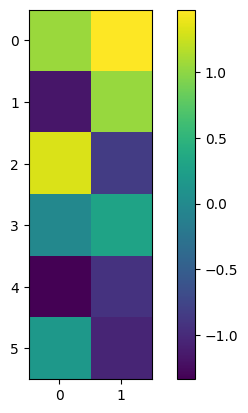

In [ ]:
plt.imshow(tsne_word_embeds)
plt.colorbar()
plt.show()

In [ ]:
# umap for embedding visualization